In [1]:
import gpxpy

import pandas as pd

import matplotlib

from pytz import timezone

from utils import (
    init_postgis, 
    get_location_error, 
    crop_route, 
    get_total_distance,
    get_gpx_df,
    plot_map,
    plot_location_error,
    plot_elevation,
)

In [2]:
matplotlib.rcParams['timezone'] = 'Asia/Singapore'

In [3]:
input_dir = f"../singapore/benjamin-sheares-bridge"

In [4]:
start_location = (1.309743979078668, 103.89449080743935)
stop_location = (1.309743979078668, 103.89449080743935)

In [5]:
init_postgis('gpx_route', input_dir + '/route.gpx')
init_postgis('glonass', input_dir + '/glonass.gpx')
init_postgis('galileo', input_dir + '/galileo.gpx')
init_postgis('qzss', input_dir + '/qzss.gpx')

In [6]:
glonass_df = get_location_error('glonass')
glonass_df = crop_route(glonass_df, start_location, stop_location, 200)
glonass_df.head(3)

time  latitude   longitude  distance_to_route  \
0 2024-05-27 06:20:47.641000+08:00  1.309432  103.894385           8.506505   
1 2024-05-27 06:20:48.641000+08:00  1.309440  103.894357           6.876010   
2 2024-05-27 06:20:49.642000+08:00  1.309445  103.894325           5.520462   

   start_distance  stop_distance  
0       36.485946      36.485946  
1       36.778371      36.778371  
2       37.860815      37.860815

In [7]:
galileo_df = get_location_error('galileo')
galileo_df = crop_route(galileo_df, start_location, stop_location, 200)
galileo_df.head(3)

time  latitude   longitude  distance_to_route  \
0 2024-06-27 22:01:23.692000+08:00  1.309485  103.894632          23.594221   
1 2024-06-27 22:01:24.692000+08:00  1.309478  103.894620          22.436821   
2 2024-06-27 22:01:25.692000+08:00  1.309472  103.894605          20.960953   

   start_distance  stop_distance  
0       32.646771      32.646771  
1       32.704171      32.704171  
2       32.682594      32.682594

In [8]:
qzss_df = get_location_error('qzss')
qzss_df = crop_route(qzss_df, start_location, stop_location, 200)
qzss_df.head(3)

time  latitude   longitude  distance_to_route  \
0 2024-06-26 22:08:55.439000+08:00  1.309428  103.894555          17.734088   
1 2024-06-26 22:08:56.440000+08:00  1.309423  103.894547          17.293914   
2 2024-06-26 22:08:57.440000+08:00  1.309420  103.894540          16.935502   

   start_distance  stop_distance  
0       35.626482      35.626482  
1       35.996657      35.996657  
2       36.239849      36.239849

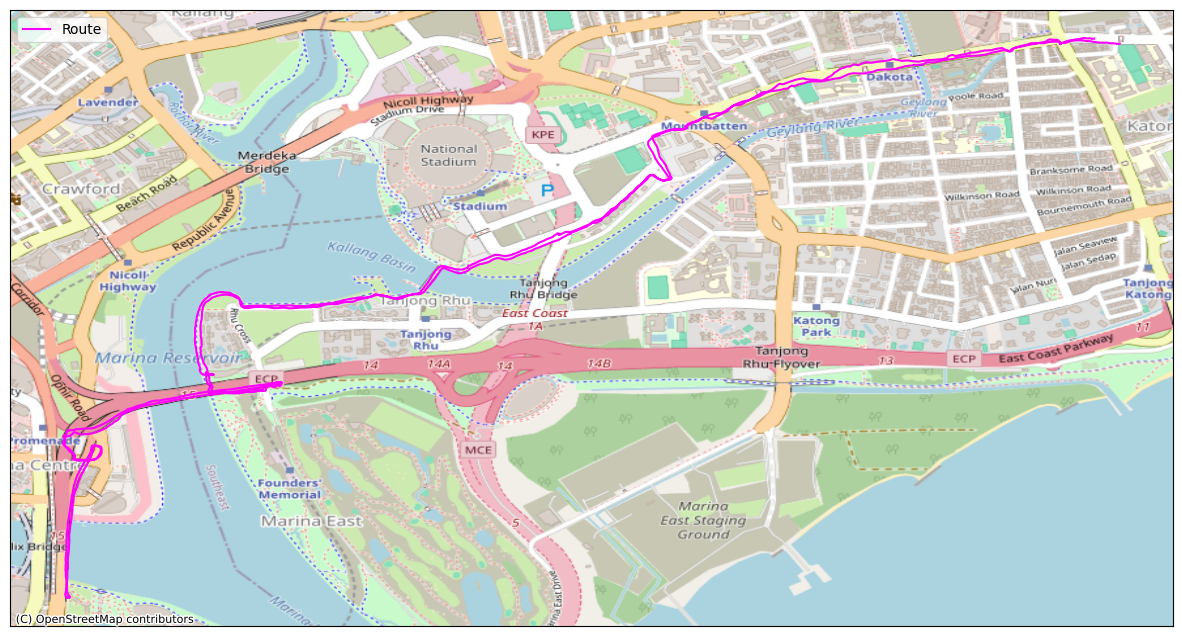

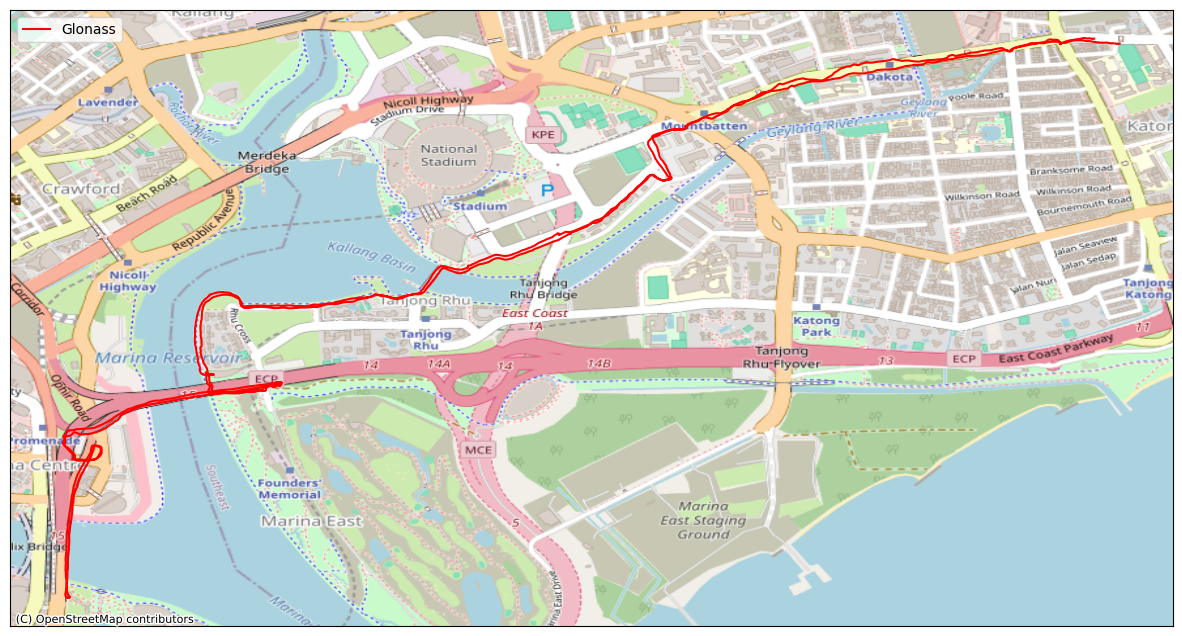

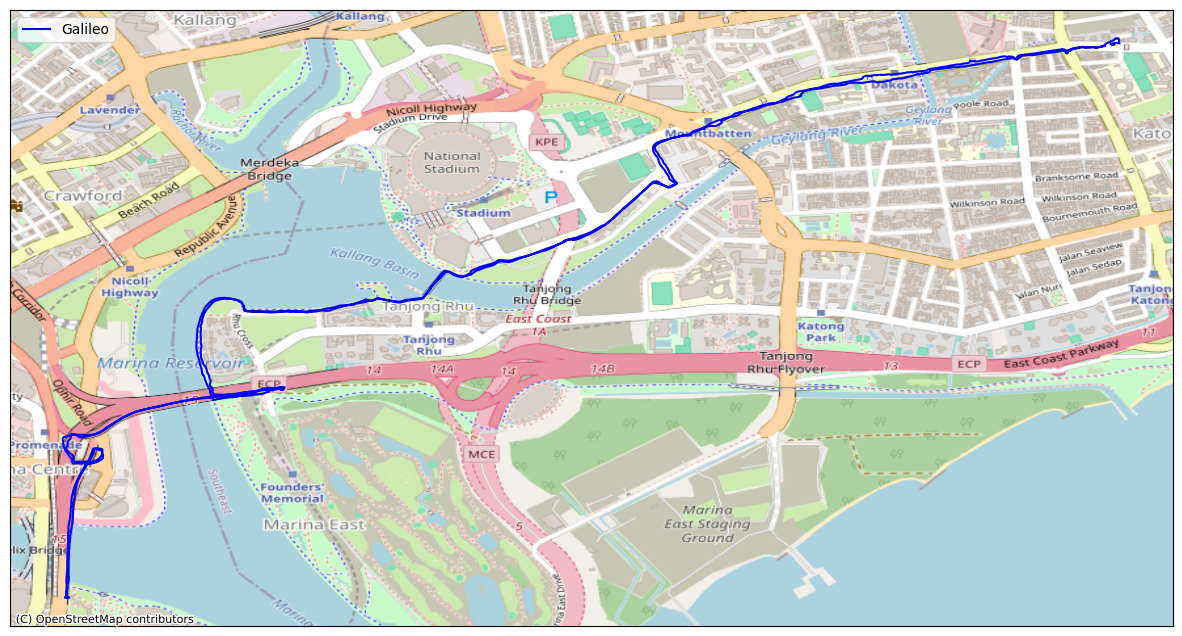

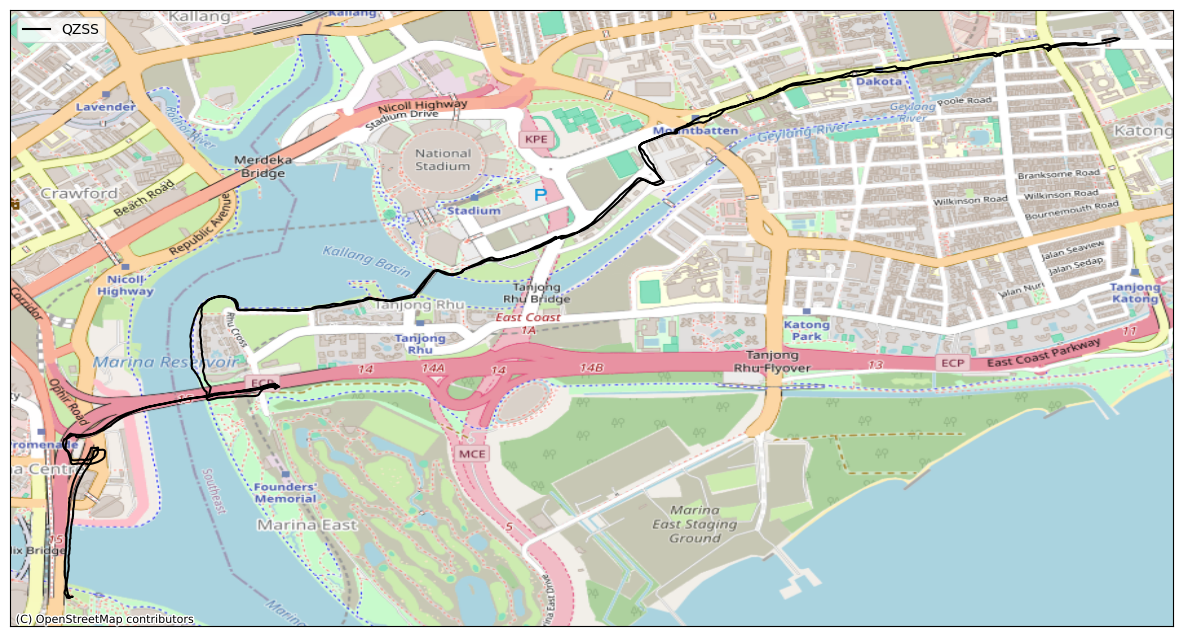

In [17]:
route_df = get_gpx_df(input_dir + '/route.gpx')
plot_map(glonass_df, 'magenta', 'Route')

plot_map(glonass_df, 'red', 'Glonass')
plot_map(galileo_df, 'blue', 'Galileo')
plot_map(qzss_df, 'black', 'QZSS')

In [10]:
desc_glonass_df = glonass_df['distance_to_route'].describe().to_frame()
desc_glonass_df.columns = ['Glonass']

desc_galileo_df = galileo_df['distance_to_route'].describe().to_frame()
desc_galileo_df.columns = ['Galileo']

desc_qzss_df = qzss_df['distance_to_route'].describe().to_frame()
desc_qzss_df.columns = ['QZSS']

merged_desc = pd.concat([desc_glonass_df, desc_galileo_df, desc_qzss_df], axis=1)
merged_desc.to_csv('/tmp/merged_desc.csv')

print(merged_desc)

           Glonass      Galileo         QZSS
count  4578.000000  4899.000000  4377.000000
mean      8.239243     6.505028     7.952961
std       7.284880     5.341225     7.193113
min       0.002431     0.001662     0.002440
25%       2.870726     2.805011     2.615803
50%       6.703820     5.254399     5.891183
75%      11.454589     8.657075    10.735518
max      46.822614    37.230703    41.164578


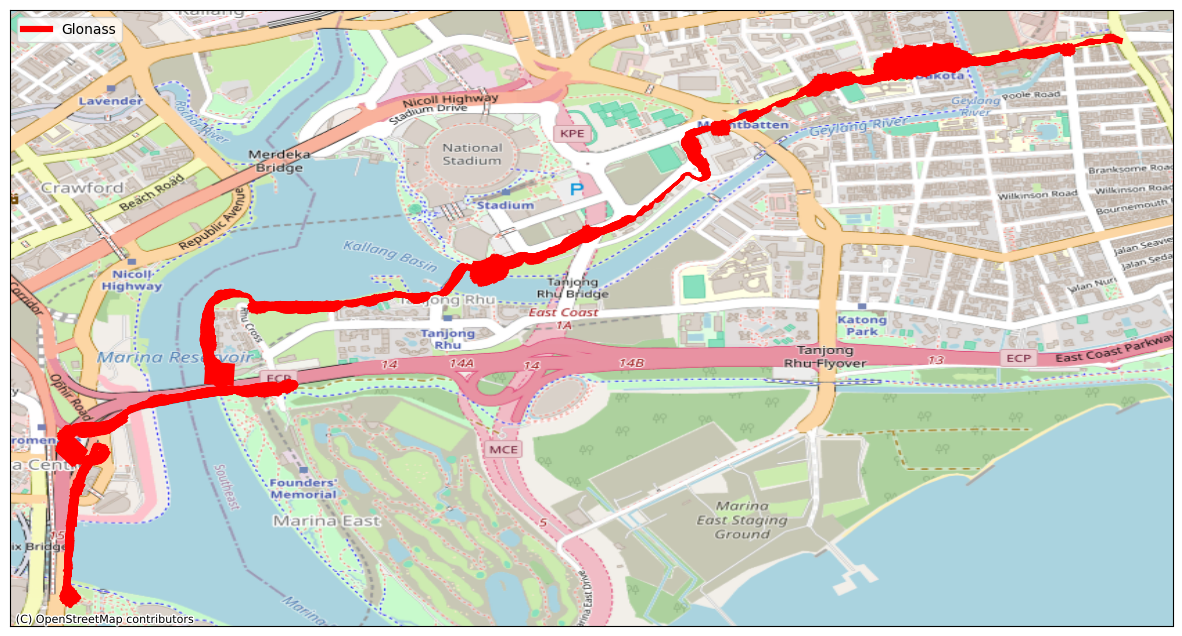

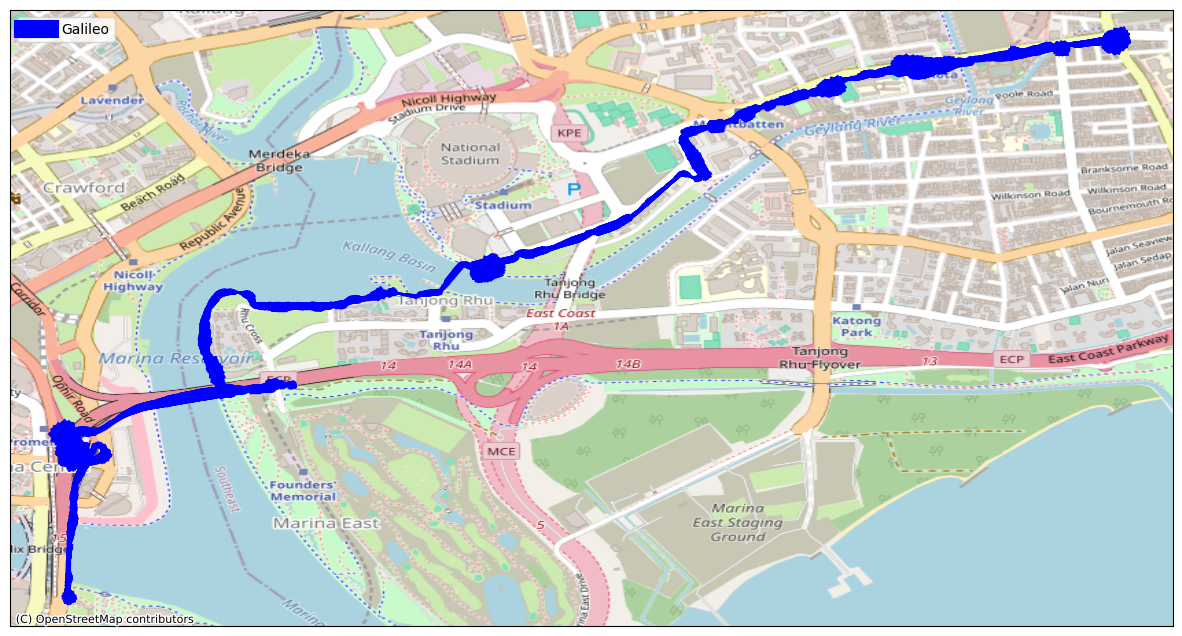

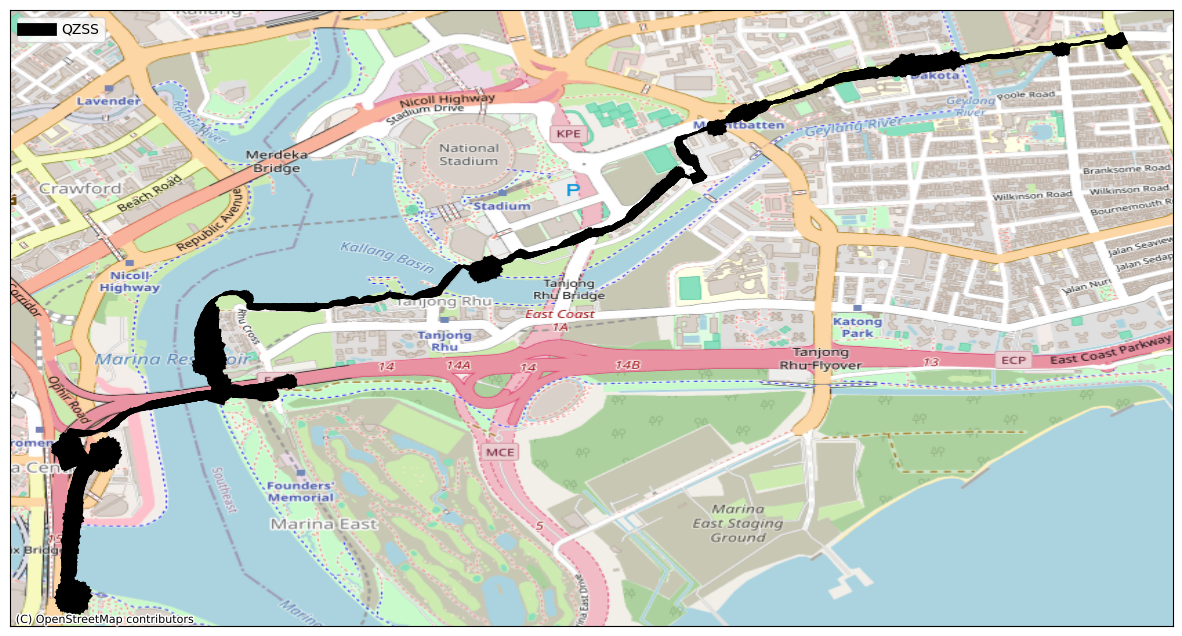

In [11]:
plot_location_error(glonass_df, 'red', 'Glonass')
plot_location_error(galileo_df, 'blue', 'Galileo')
plot_location_error(qzss_df, 'black', 'QZSS')

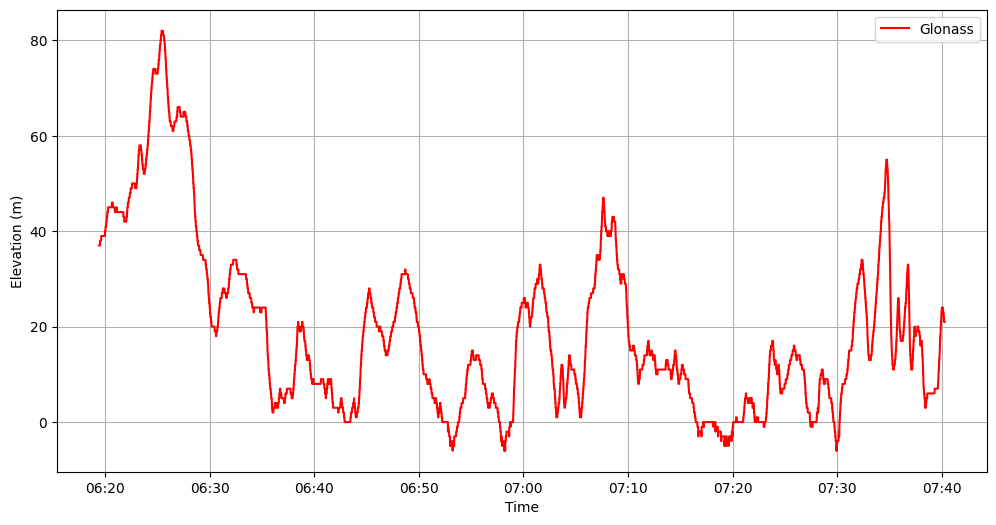

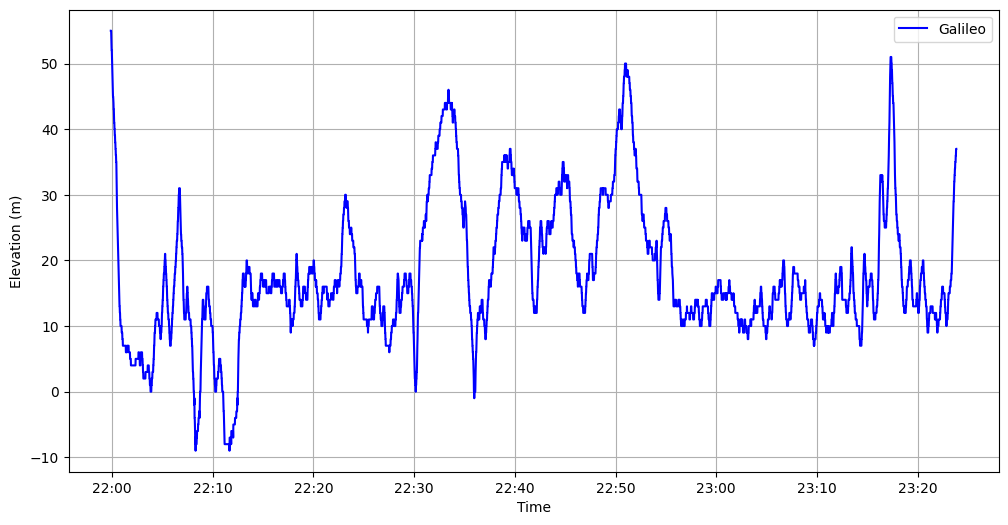

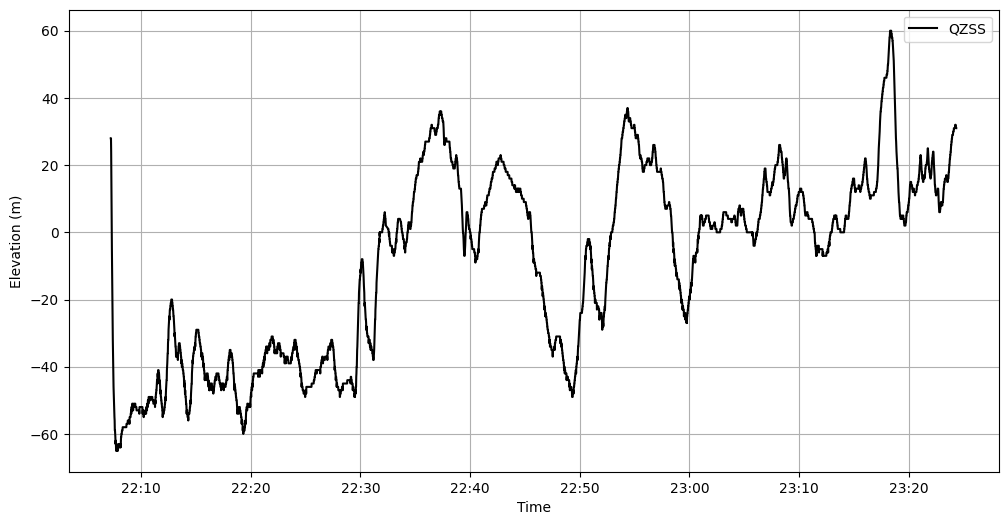

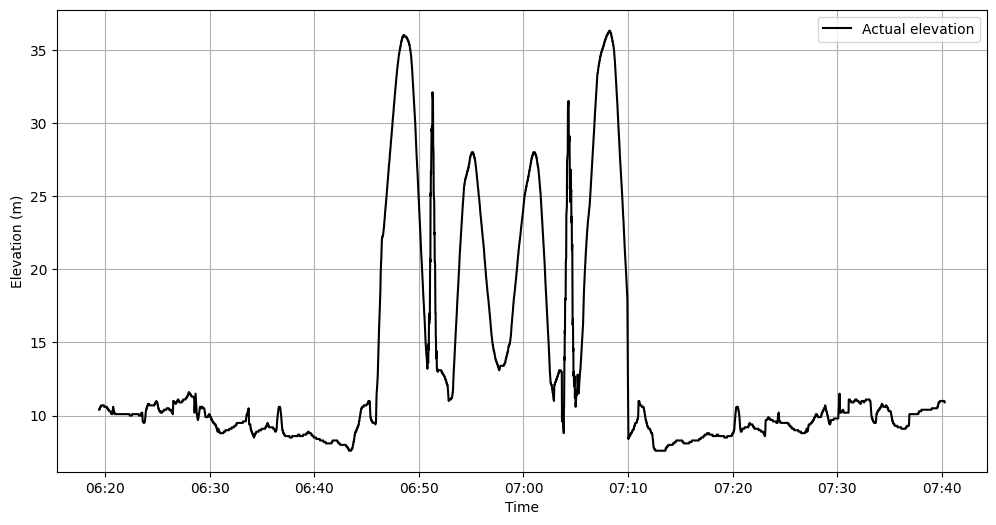

In [12]:
elevation_df = get_gpx_df(input_dir + '/elevation.gpx')
glonass_df = get_gpx_df(input_dir + '/glonass.gpx')
galileo_df = get_gpx_df(input_dir + '/galileo.gpx')
qzss_df = get_gpx_df(input_dir + '/qzss.gpx')

plot_elevation(elevation_df, 'magenta', 'Actual elevation')
plot_elevation(glonass_df, 'red', 'Glonass')
plot_elevation(galileo_df, 'blue', 'Galileo')
plot_elevation(qzss_df, 'black', 'QZSS')